In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
%matplotlib inline

In [2]:
#from google.colab import drive

#drive.mount('/content/drive')

## Loading data frame

In [3]:
#isabelles data path:
# data_path = '/content/drive/My Drive/Colab Notebooks/cars_files/'
#isabelles data load
# df = pd.read_csv(data_path + 'copy_sample.csv', parse_dates=['TEST_SDATE', 'TEST_EDATE'], lineterminator='\n')

In [4]:
# caitlin's local file path
data_path = 'C:/Users/Caitlin/Documents/DataScience/WIMLDS/cleaned/'
df = pd.read_csv(data_path + 'sample.csv', parse_dates=['TEST_SDATE','TEST_EDATE'], lineterminator='\n')

C:\Users\Caitlin\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3051: DtypeWarning: Columns (5,7,18,26,108,109,113) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)



## Target variable, reduce

In [5]:
list(df)

['RecordID',
 'RECORD_NUM',
 'VIR_CERT_NUMBER',
 'STATION_NUM',
 'ANALYZER_NUM',
 'INSPECTOR_NUM',
 'TEST_TYPE',
 'VID_TEST_TYPE',
 'TEST_SDATE',
 'TEST_EDATE',
 'VIN',
 'VIN_SOURCE',
 'VEH_LICENSE',
 'GVW_TYPE',
 'GVWR',
 'MODEL_YEAR',
 'MAKE',
 'MODEL',
 'CYL',
 'ENGINE_SIZE',
 'TRANS_TYPE',
 'DUAL_EXHAUST',
 'ODOMETER',
 'FUEL_TYPE',
 'VEHICLE_TYPE',
 'EMISS_COST',
 'ZIP_CODE',
 'CERTIFICATION',
 'ESC',
 'VRT_RECORD_ID',
 'E_TEST_SEQUENCE',
 'E_PRECOND_PROCEDURE',
 'E_HIGH_DCF',
 'E_HIGH_RPM',
 'E_HIGH_CO2',
 'E_HIGH_O2',
 'E_HIGH_HC',
 'E_HIGH_HC_DCF',
 'E_HIGH_HC_LIMIT',
 'E_HIGH_CO',
 'E_HIGH_CO_DCF',
 'E_HIGH_CO_LIMIT',
 'E_IDLE_DCF',
 'E_IDLE_RPM',
 'E_IDLE_CO2',
 'E_IDLE_O2',
 'E_IDLE_HC',
 'E_IDLE_HC_DCF',
 'E_IDLE_HC_LIMIT',
 'E_IDLE_CO',
 'E_IDLE_CO_DCF',
 'E_IDLE_CO_LIMIT',
 'E_HIGH_DCF_2',
 'E_HIGH_RPM_2',
 'E_HIGH_CO2_2',
 'E_HIGH_O2_2',
 'E_HIGH_HC_2',
 'E_HIGH_HC_DCF_2',
 'E_HIGH_CO_2',
 'E_HIGH_CO_DCF_2',
 'E_IDLE_DCF_2',
 'E_IDLE_RPM_2',
 'E_IDLE_CO2_2',
 'E_IDLE_O2_

In [6]:
keep_cols = ['VIR_CERT_NUMBER', 'STATION_NUM', 'ANALYZER_NUM', 'INSPECTOR_NUM', 'TEST_SDATE', 'TEST_EDATE', 'VIN', 'VIN_SOURCE',
             'VEH_LICENSE', 'GVW_TYPE', 'GVWR', 'MODEL_YEAR', 'MAKE', 'MODEL', 'CYL', 'ENGINE_SIZE', 'TRANS_TYPE', 
             'DUAL_EXHAUST', 'ODOMETER', 'FUEL_TYPE', 'VEHICLE_TYPE', 'ZIP_CODE', 'CERTIFICATION', 'ESC', 'VRT_RECORD_ID', 
             'ABORT_CODE', 'SOFTWARE_VERSION', 'INSP_COMMENTS', 'OVERALL_RESULT', 'ABORT_CODE_OTHER_DESC', 'MECHANIC_LAST_NAME',
             'MECHANIC_FIRST_NAME', 'MECHANIC_MIDDLE_INIT', 'ENGINE_SIZE_ORIG', 'VID_TEST_TYPE']

df = df[keep_cols]

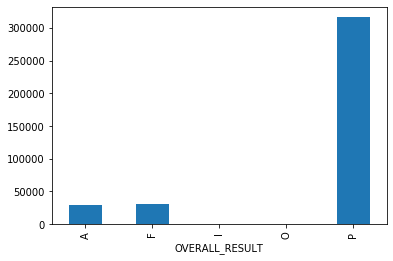

In [7]:
df.groupby('OVERALL_RESULT').size().plot.bar()

In [8]:
df.OVERALL_RESULT.value_counts()

P    316732
F     30051
A     28701
O        10
I         9
Name: OVERALL_RESULT, dtype: int64

In [9]:
#df = df[df.OVERALL_RESULT.isin(['P', 'F', 'A'])]

##### Select only pass & fail

In [10]:
df = df[(df.OVERALL_RESULT == 'P')|(df.OVERALL_RESULT=='F')]

##### Create age variable

In [11]:
df['AGE'] = pd.to_datetime(df["TEST_EDATE"]).dt.year - df["MODEL_YEAR"]

In [12]:
df['AGE'] += 1

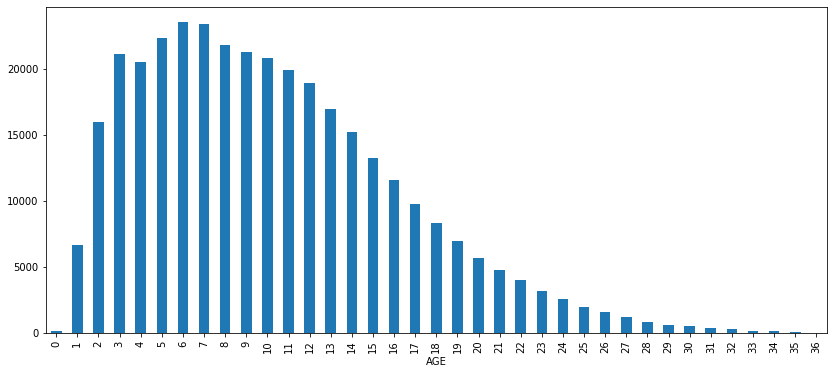

In [13]:
# Age distribution
#fig, ax = plt.subplots(figsize=(14,6))
#df.groupby('AGE').size().plot.bar()

## Checkout VINs

In [14]:
len(df.VIN.unique())

127791

In [15]:
len(df)

346783

In [22]:
print(f'Out of {len(df)} entries in the system, {len(df)-len(df.VIN.unique())}, or {(len(df)-len(df.VIN.unique()))/len(df) *100}% are in there more than once.')

Out of 346783 entries in the system, 218992, or 63.14957768979448% are in there more than once.


### To do

#### Compare the number of times the car has been tested with the age of the car

#### Compare the number of times the car has been tested with Pass/Fail

In [23]:
df['NUM_VISITS'] = df.VIN.groupby(df.VIN).transform('count')

In [24]:
len(df[df['NUM_VISITS']>1]), len(df[df['NUM_VISITS']==1])

(294484, 52299)

In [79]:
# get number of pass/fail for each car
# df['NUM_PASS'] = df.VIN.groupby(df.VIN, df.OVERALL_RESULT=='P').transform('count'))

In [25]:
test = df.groupby('VIN')['OVERALL_RESULT'].value_counts().unstack().fillna(0)

In [26]:
test.head()

OVERALL_RESULT,F,P
VIN,,
0F1AC4222PB200660,0.0,1.0
0FMCU93158KD84024,0.0,1.0
0N1BC11E69L466681,0.0,1.0
0N8AR05SXVW181282,0.0,1.0
0S4BP62C377301194,0.0,1.0


In [27]:
test2= test.reset_index()

In [28]:
test2

OVERALL_RESULT,VIN,F,P
0,0F1AC4222PB200660,0.0,1.0
1,0FMCU93158KD84024,0.0,1.0
2,0N1BC11E69L466681,0.0,1.0
3,0N8AR05SXVW181282,0.0,1.0
4,0S4BP62C377301194,0.0,1.0
...,...,...,...
127786,ZFFYR51A3X0116639,3.0,0.0
127787,ZFFYR51R9X0118072,1.0,0.0
127788,ZFFYT53A310122964,0.0,2.0
127789,ZHWGU12T36LA03105,1.0,5.0


In [29]:
df2 = pd.merge(df,test2, on='VIN')

In [30]:
df2=df2.rename(columns=({'F':'NUM_FAIL', 'P':'NUM_PASS'}))

In [31]:
len(df2)

346783

In [32]:
# will keep 1 copy from the duplicates that are there. It keeps the last one that it finds.
# would be more informative to first sort the dataframe by VIN & NUM_VISITS, and have it 
# keep the last entry for each car.
df2 = df2.sort_values(by=['VIN', 'NUM_VISITS'])

In [33]:
df3=df2.drop_duplicates('VIN', keep='last')

In [34]:
df3.head()

,VIR_CERT_NUMBER,STATION_NUM,ANALYZER_NUM,INSPECTOR_NUM,TEST_SDATE,TEST_EDATE,VIN,VIN_SOURCE,VEH_LICENSE,GVW_TYPE,GVWR,MODEL_YEAR,MAKE,MODEL,CYL,ENGINE_SIZE,TRANS_TYPE,DUAL_EXHAUST,ODOMETER,FUEL_TYPE,VEHICLE_TYPE,ZIP_CODE,CERTIFICATION,ESC,VRT_RECORD_ID,ABORT_CODE,SOFTWARE_VERSION,INSP_COMMENTS,OVERALL_RESULT,ABORT_CODE_OTHER_DESC,MECHANIC_LAST_NAME,MECHANIC_FIRST_NAME,MECHANIC_MIDDLE_INIT,ENGINE_SIZE_ORIG,VID_TEST_TYPE,AGE,NUM_VISITS,NUM_FAIL,NUM_PASS
99859,5053210.0,IR277,W094,2627911,2006-11-29 07:49:00,2006-11-29 07:55:00,0F1AC4222PB200660,S,HNX846,1.0,3000,1993,SUBARU,LOYALE,4,1800,M,N,128300,G,1,87102,F,5.0,930227,NaN,158,NaN,P,NaN,TRUDEN,LOUIS,A,NaN,I,14,1,0.0,1.0
313048,7610529.0,IS407,W102,AC083899,2016-05-22 13:14:00,2016-05-22 13:15:00,0FMCU93158KD84024,S,MYK742,1.0,3375,2008,FORD,ESCAPE,6,3000,A,N,112414,G,4,87111,C,20.0,0,NaN,503,NaN,P,NaN,Lee,William,D,NaN,I,9,1,0.0,1.0
318309,7740581.0,IS498,W028,AC084941,2016-10-29 15:30:00,2016-10-29 15:31:00,0N1BC11E69L466681,S,LBX368,1.0,0,2009,NISSAN,VERSA,4,1800,A,N,122304,G,1,87121,C,6.0,0,NaN,503,NaN,P,NaN,BUTTERWORTH,QUENTIN,R,1.8L,I,8,1,0.0,1.0
45063,4604724.0,IS212,W111,33191251,2005-05-20 16:13:00,2005-05-20 16:19:00,0N8AR05SXVW181282,S,153JWZ,1.0,4850,1997,NISSAN,PATHFINDER,6,3300,A,N,90478,G,4,87112,F,20.0,970357,NaN,147,NaN,P,NaN,CROWSON,GARY,L,NaN,I,9,1,0.0,1.0
271567,6973938.0,IS364,W061,AC084367,2013-07-13 15:03:00,2013-07-13 15:05:00,0S4BP62C377301194,S,LBP806,1.0,3875,2007,SUBARU,OUTBACK,4,2500,A,N,93475,G,2,87114,C,6.0,0,NaN,501,NaN,P,NaN,Ewing,Anthony,M,NaN,I,7,1,0.0,1.0


In [35]:
# add proportion pass
df3['PROP_PASS'] = df3['NUM_PASS']/df3['NUM_VISITS']

C:\Users\Caitlin\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


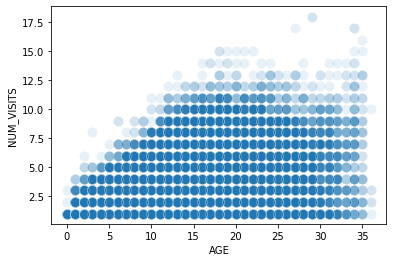

In [36]:
sns.scatterplot(x='AGE', y='NUM_VISITS', s=100, alpha=.1, data=df3)

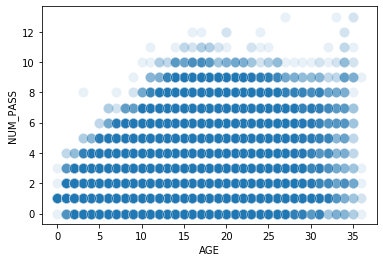

In [37]:
sns.scatterplot(x='AGE', y='NUM_PASS', s=100, alpha=.1, data=df3)

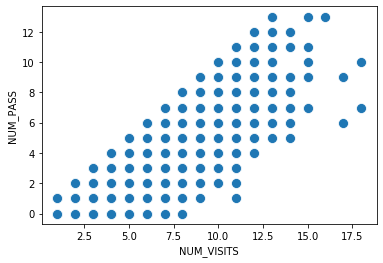

In [38]:
sns.scatterplot(x='NUM_VISITS', y='NUM_PASS', s=100, data=df3)

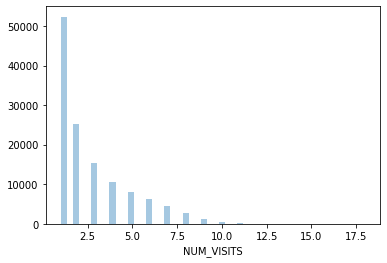

In [39]:
sns.distplot(df3['NUM_VISITS'], kde=False)

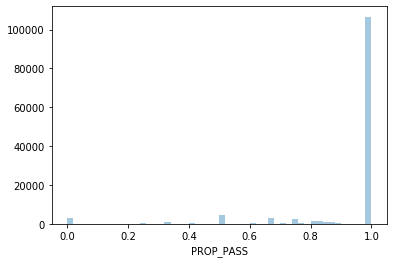

In [40]:
sns.distplot(df3['PROP_PASS'], kde=False)

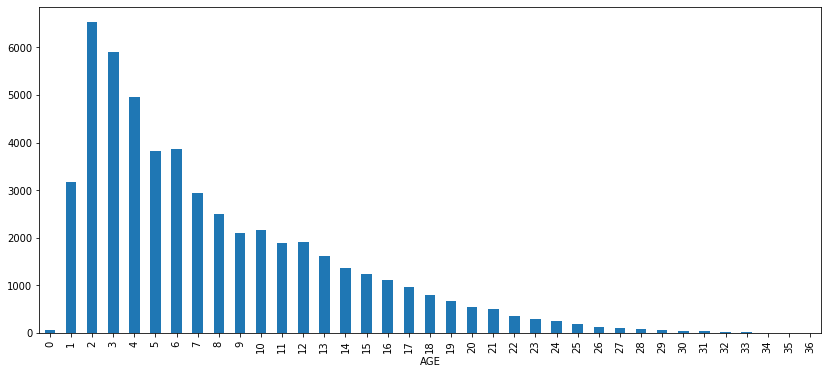

In [42]:
fig, ax = plt.subplots(figsize=(14,6))
df[df['NUM_VISITS']==1].groupby('AGE').size().plot.bar()

The cars who have only been checked once tend to be newer cars, although we do see some older cars. The older cars are likely used cars from outside Bernalillo county. 

Important to note is the nearly expontential decline in age.

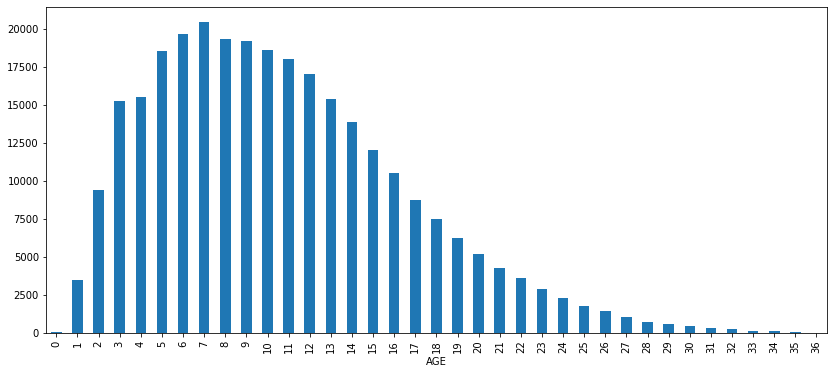

In [43]:
fig, ax = plt.subplots(figsize=(14,6))
df[df['NUM_VISITS']>1].groupby('AGE').size().plot.bar()

With the cars that have been tested more than once, we see that they follow the same distribution as when they were all combined.

In [44]:
# Want to plot age of the car with how many times it has been tested. 
# x = number of times tested
# y = age
# how to get number of times tested? 
# test = df_nonunique_vins['VIN'].value_counts()

